<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-:-a-visual-intuition-of-activation-functions" data-toc-modified-id="Introduction-:-a-visual-intuition-of-activation-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction : a visual intuition of activation functions</a></span></li><li><span><a href="#Build-an-MLP-to-classify-MNIST-images" data-toc-modified-id="Build-an-MLP-to-classify-MNIST-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build an MLP to classify MNIST images</a></span></li></ul></div>

# Introduction to the Multi Layer Perceptron

## Introduction : a visual intuition of activation functions

Using a regression task on the sinus function, we'll try to get an intuition of the effect of activation functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

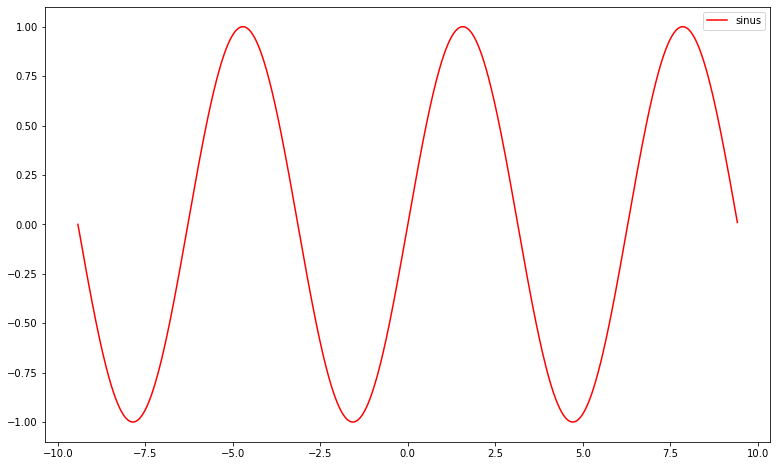

In [4]:
X = np.arange(-3*np.pi,3*np.pi,0.01)
y = np.sin(X)

plt.figure(figsize=(13,8))
plt.plot(X, y, label='sinus', color='red')
plt.legend()
plt.show()

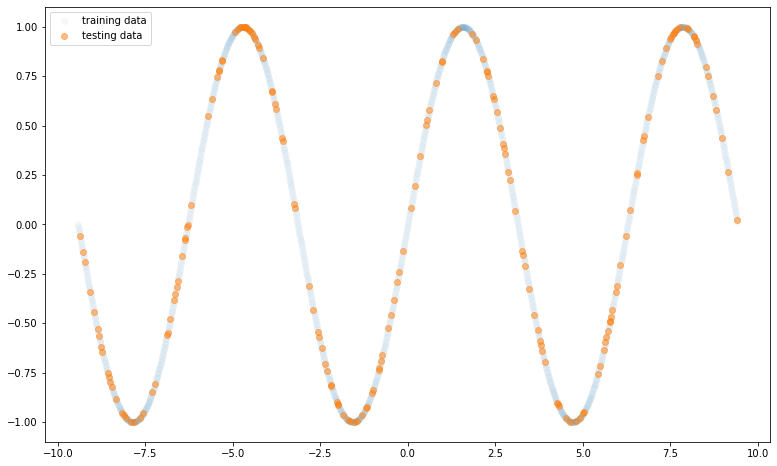

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

plt.figure(figsize=(13,8))
plt.scatter(X_train, y_train, alpha = 0.03, label='training data')
plt.scatter(X_test, y_test,alpha=0.5,label='testing data')

plt.legend()
plt.show()

$$[TODO - Students]$$

* Build a model with 1 hidden layer in 1 dimension and train it on x_train, y_train.
* What activation should we use for ouput layer ?
* What loss should we use ?

* Try different activations for the hidden layer and plot the predictions obtained on x_test
* Plot also a learning curve

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1696,), (189,), (1696,), (189,))

In [12]:
## Code is given in the slides. 
# shape must be one
import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
inputs = Input(shape=(1, ))
x = Dense(16, activation='sigmoid')(inputs)
outputs = Dense(1)(x)
model = Model(inputs, outputs)
model.compile(optimizer='sgd', loss='mean_squared_error')
history=model.fit(X_train, y_train, epochs=20, validation_split=0.33)
y_pred = model.predict(X_test)

Epoch 1/20
36/36 [==============================] - 0s 4ms/step - loss: 0.8532 - val_loss: 0.5420
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 0.5201 - val_loss: 0.4952
Epoch 3/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4940 - val_loss: 0.4929
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4891 - val_loss: 0.4839
Epoch 5/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4866 - val_loss: 0.4856
Epoch 6/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4847 - val_loss: 0.4895
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4844 - val_loss: 0.4827
Epoch 8/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4826 - val_loss: 0.4788
Epoch 9/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4816 - val_loss: 0.4786
Epoch 10/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4805 - val_loss: 0.4785
Epoch 11/20
36/36 [

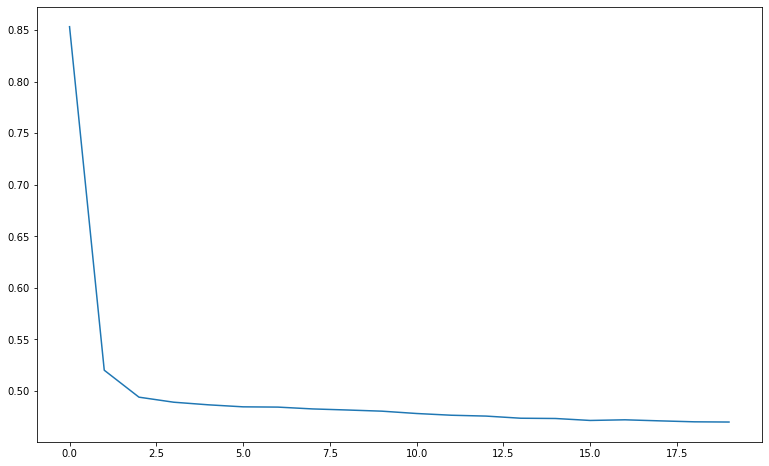

In [13]:
# Plot leaning cuve
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'])
plt.show()

In [14]:
def plot_prediction(title, model):
    y_hat_test = model.predict(X_test)

    plt.figure()
    plt.scatter(X_test, y_test, label = 'ground_truth', alpha=0.1)
    plt.scatter(X_test, y_hat_test, label = 'predicted', alpha=0.5)
    plt.legend()
    
    plt.title(title)
    plt.show()

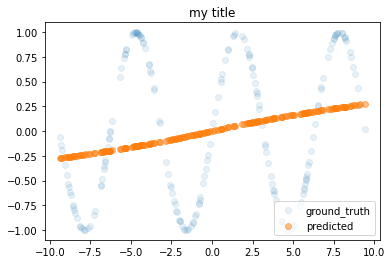

In [15]:
plot_prediction("my title", model)

$$[TODO - Students]$$

Try adding layers and increasing the layers dimension to better fit the test data. You can use the following function to quickly build your models.

* Try different n_layers (for example 1, 10, 100)
* Try different hidden_dim (for example 32, 128, 256, 512)
* Try different bach size
* Try to understand the `patience` parameters of early stopping

### 1 and 32 combination

In [52]:
def build_sin_regression(activation, n_layers, hidden_dim):
    input = Input(shape=(1,), name='input')

    for i in range(n_layers):
      if i==0:
        x = Dense(input_shape=(1,), units=hidden_dim, activation=activation, name='layer_'+str(i))(input)
      else:
        x = Dense(units=hidden_dim, activation=activation, name='layer_'+str(i))(x)

    output = Dense(1, activation='linear', name='output')(x)
    model = Model(input, output, name = 'sinus_regression')
    return model

In [53]:
model = build_sin_regression(activation = 'sigmoid', n_layers = 1, hidden_dim = 32) ## was trying Linear changed to sigmoid, it performs better

model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sinus_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1)]               0         
                                                                 
 layer_0 (Dense)             (None, 32)                64        
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [54]:
callbacks_list = [EarlyStopping(monitor='val_loss', min_delta=0.005, patience=20, verbose=2, mode='min', restore_best_weights=True)
                 ]

history = model.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

Epoch 1/20
48/48 [==============================] - 0s 3ms/step - loss: 0.9487 - val_loss: 0.6392
Epoch 2/20
48/48 [==============================] - 0s 1ms/step - loss: 0.5257 - val_loss: 0.4918
Epoch 3/20
48/48 [==============================] - 0s 1ms/step - loss: 0.4680 - val_loss: 0.4743
Epoch 4/20
48/48 [==============================] - 0s 1ms/step - loss: 0.4632 - val_loss: 0.4724
Epoch 5/20
48/48 [==============================] - 0s 1ms/step - loss: 0.4621 - val_loss: 0.4684
Epoch 6/20
48/48 [==============================] - 0s 1ms/step - loss: 0.4611 - val_loss: 0.4696
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4598 - val_loss: 0.4676
Epoch 8/20
48/48 [==============================] - 0s 1ms/step - loss: 0.4591 - val_loss: 0.4634
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4570 - val_loss: 0.4642
Epoch 10/20
48/48 [==============================] - 0s 1ms/step - loss: 0.4558 - val_loss: 0.4632
Epoch 11/20
48/48 [

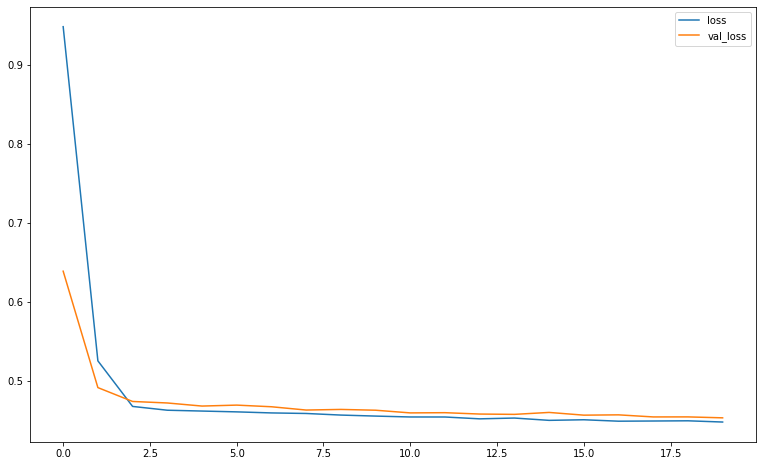

In [55]:
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

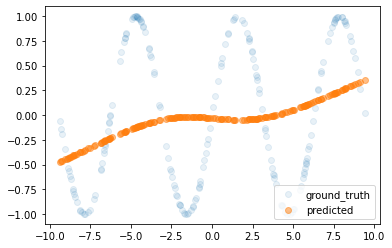

In [56]:
y_hat_test = model.predict(X_test)

plt.scatter(X_test, y_test,label = 'ground_truth', alpha=0.1)
plt.scatter(X_test, y_hat_test,label = 'predicted', alpha=0.5)

plt.legend()
plt.show()

### 10 and 256 combination

In [57]:
model2 = build_sin_regression(activation = 'sigmoid', n_layers = 10, hidden_dim = 256)
model2.compile(loss='mse', optimizer='adam')
model2.summary()

Model: "sinus_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1)]               0         
                                                                 
 layer_0 (Dense)             (None, 256)               512       
                                                                 
 layer_1 (Dense)             (None, 256)               65792     
                                                                 
 layer_2 (Dense)             (None, 256)               65792     
                                                                 
 layer_3 (Dense)             (None, 256)               65792     
                                                                 
 layer_4 (Dense)             (None, 256)               65792     
                                                                 
 layer_5 (Dense)             (None, 256)          

In [58]:
callbacks_list = [EarlyStopping(monitor='val_loss', min_delta=0.005, patience=20, verbose=2, mode='min', restore_best_weights=True)
                 ]

history2 = model2.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

Epoch 1/20
48/48 [==============================] - 1s 7ms/step - loss: 0.5486 - val_loss: 0.5320
Epoch 2/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5120 - val_loss: 0.4965
Epoch 3/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5081 - val_loss: 0.5148
Epoch 4/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5111 - val_loss: 0.5341
Epoch 5/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5178 - val_loss: 0.4944
Epoch 6/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5093 - val_loss: 0.5115
Epoch 7/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5139 - val_loss: 0.4954
Epoch 8/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5104 - val_loss: 0.4950
Epoch 9/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5165 - val_loss: 0.4932
Epoch 10/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5082 - val_loss: 0.4965
Epoch 11/20
48/48 [

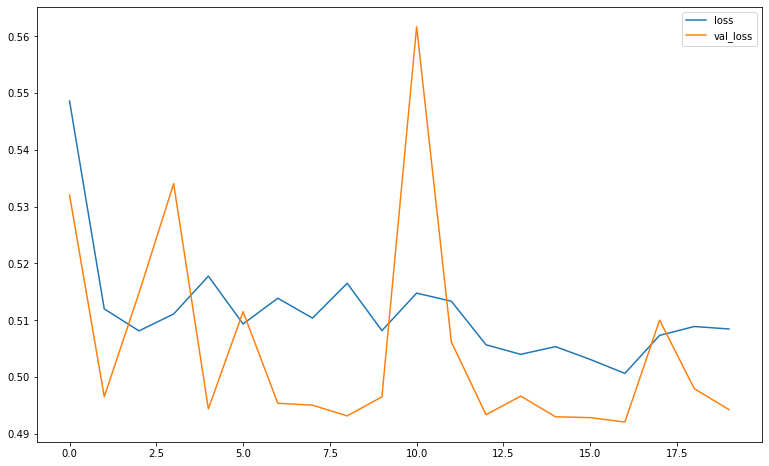

In [59]:
plt.figure(figsize=(13,8))
plt.plot(history2.history['loss'], label="loss")
plt.plot(history2.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

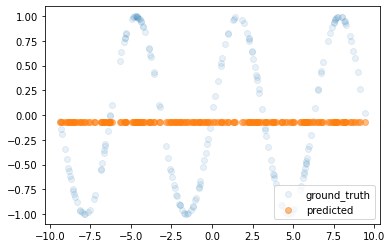

In [60]:
y_hat_test = model2.predict(X_test)

plt.scatter(X_test, y_test,label = 'ground_truth', alpha=0.1)
plt.scatter(X_test, y_hat_test,label = 'predicted', alpha=0.5)

plt.legend()
plt.show()

### 100 and 256 combination

In [61]:
model3 = build_sin_regression(activation = 'sigmoid', n_layers = 100, hidden_dim = 256) ## was trying Linear changed to sigmoid, it performs better
model3.compile(loss='mse', optimizer='adam')
model3.summary()

Model: "sinus_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1)]               0         
                                                                 
 layer_0 (Dense)             (None, 256)               512       
                                                                 
 layer_1 (Dense)             (None, 256)               65792     
                                                                 
 layer_2 (Dense)             (None, 256)               65792     
                                                                 
 layer_3 (Dense)             (None, 256)               65792     
                                                                 
 layer_4 (Dense)             (None, 256)               65792     
                                                                 
 layer_5 (Dense)             (None, 256)          

In [62]:
callbacks_list = [EarlyStopping(monitor='val_loss', min_delta=0.005, patience=20, verbose=2, mode='min', restore_best_weights=True)
                 ]

history3 = model3.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

Epoch 1/20
48/48 [==============================] - 6s 61ms/step - loss: 0.5461 - val_loss: 0.5301
Epoch 2/20
48/48 [==============================] - 2s 51ms/step - loss: 0.5094 - val_loss: 0.4924
Epoch 3/20
48/48 [==============================] - 2s 51ms/step - loss: 0.5322 - val_loss: 0.4925
Epoch 4/20
48/48 [==============================] - 2s 52ms/step - loss: 0.5214 - val_loss: 0.4921
Epoch 5/20
48/48 [==============================] - 3s 53ms/step - loss: 0.5215 - val_loss: 0.4947
Epoch 6/20
48/48 [==============================] - 2s 50ms/step - loss: 0.5031 - val_loss: 0.5152
Epoch 7/20
48/48 [==============================] - 2s 50ms/step - loss: 0.5061 - val_loss: 0.5057
Epoch 8/20
48/48 [==============================] - 2s 50ms/step - loss: 0.5036 - val_loss: 0.4957
Epoch 9/20
48/48 [==============================] - 2s 50ms/step - loss: 0.5111 - val_loss: 0.5004
Epoch 10/20
48/48 [==============================] - 2s 50ms/step - loss: 0.5010 - val_loss: 0.4922
Epoch 11/

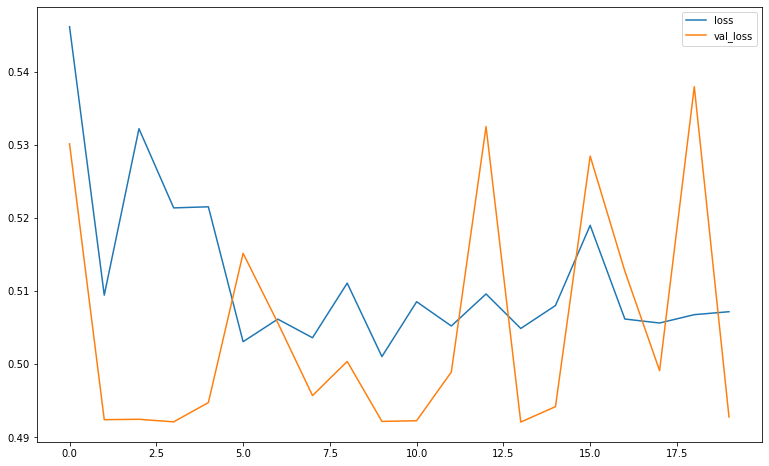

In [63]:
plt.figure(figsize=(13,8))
plt.plot(history3.history['loss'], label="loss")
plt.plot(history3.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

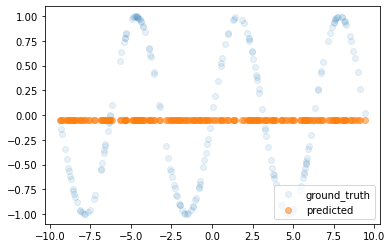

In [64]:
y_hat_test = model3.predict(X_test)

plt.scatter(X_test, y_test,label = 'ground_truth', alpha=0.1)
plt.scatter(X_test, y_hat_test,label = 'predicted', alpha=0.5)

plt.legend()
plt.show()

## Build an MLP to classify MNIST images

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We’ll call the images “x” and the labels “y”. Both the training set and test set contain images and their corresponding labels; for example, the training images are mnist.train.images and the training labels are mnist.train.labels.

In [ ]:
# Load dataset
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between a train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape

In [65]:
# Reshape the image from 3d to 2d (nb_items, other dime)
X_train_NEW = X_train.reshape(-1,1)

In [68]:
# Normalize the data (input between 0 and 1)

from numpy import asarray
from sklearn.preprocessing import MinMaxScaler # Scaler to scale between 0 and 1

scaler = MinMaxScaler()
# transform data
scaled = scaler.fit(X_train_NEW)
scaled = scaler.transform(X_train_NEW) 
print(scaled)

[[0.66082803]
 [0.71284501]
 [0.39649682]
 ...
 [0.05254777]
 [0.29193206]
 [0.07802548]]


In [76]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore') # OneHotEncoder initialization
# fit_transform to fit and transform the training data.
y_train_hencoded = enc.fit_transform(y_train.reshape(-1, 1)).toarray()
# fit_transform to fit and transform the test data.
y_test_hencoded = enc.transform(y_test.reshape(-1, 1)).toarray()

y_train_hencoded.shape , y_test_hencoded.shape

((1696, 1696), (189, 1696))

In [81]:
# Buid MLP model
# You can use the following function
def build_MLP(input_shape, activation, layers, nb_class):
    input = Input(shape=(input_shape,), name='input')

    for i, hidden_size in enumerate(layers):
        if i == 0:
            x = Dense(input_shape=(input_shape,), units=hidden_size, activation=activation, name='layer_'+str(i))(input)
        else:
            x = Dense(units=hidden_size, activation=activation, name='layer_'+str(i))(x)

    output = Dense(nb_class, activation='softmax', name='output')(x)
    model = Model(input, output, name = 'mnist_classifier')
    model.summary()
    return model

model4 = build_MLP(input_shape = 1696 , activation= 'relu' ,layers = [256] , nb_class=5)

Model: "mnist_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1696)]            0         
                                                                 
 layer_0 (Dense)             (None, 256)               434432    
                                                                 
 output (Dense)              (None, 5)                 1285      
                                                                 
Total params: 435,717
Trainable params: 435,717
Non-trainable params: 0
_________________________________________________________________


In [88]:
# # Compile and fit the model
# callbacks_list = [EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=20,
#                                 verbose=2, mode='min', restore_best_weights=True)
#                  ]

# model4.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer='adam')
# history = model4.fit(''' X''', ''' y ''', validation_data= (X_test, y_test_hencoded), callbacks=callbacks_list,
#                     batch_size=32, epochs=20)

In [ ]:
# Print history keys
history.history.keys()

In [ ]:
# Babysit your model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26,8))

ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()
ax2.plot(history.history['accuracy'], label="accuracy")
ax2.plot(history.history['val_accuracy'], label="val_accuracy")
ax2.legend()
plt.show()

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test_enc)
print('Test loss:', score[0])
print('Test accuracy', score[1])

In [ ]:
# Modify the network in order to obtain better accuracy (better than 0.96)